# Visualization with hierarchical clustering and t-SNE


Hierarchical clustering merges the data samples into ever-coarser clusters, yielding a tree visualization of the resulting cluster hierarchy. t-SNE maps the data samples into 2d space so that the proximity of the samples to one another can be visualized.

t-SNE creates a 2d map of any dataset, and conveys useful information about the proximity of the samples to one another.

For hierarchy of groups these groups are contained in one another and form a hierachy. So it arranges samples into a hierarchy of clusters. Hierarchical clustering can produce great visualizations. 

Every data point has its own clusters at the beginning. At each step the two closest clusters are merged until single cluster left. That is agglomerative hierarchical clustering. Divisive clustering works the other way around.

In [216]:
import pandas as pd
songs = pd.read_csv("songs.csv")
songs = songs.fillna(0)

In [219]:
eur = songs.pivot_table("Televote Points","From country", "To country" ).fillna(12)

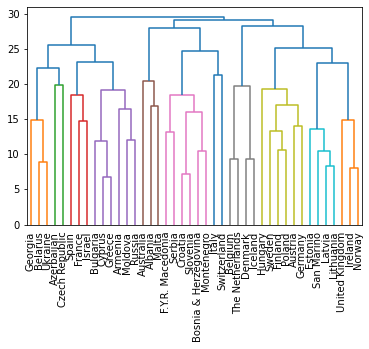

In [220]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
country_names = list(eur.index)
mergings = linkage(eur, method="complete")
dendrogram(mergings, labels=country_names, leaf_font_size=10, leaf_rotation=90)
plt.show()

### Hierarchical clustering of the grain data

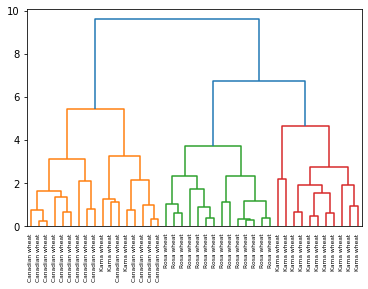

In [191]:
samples = pd.read_csv("seeds.csv", header=None)
n_samples = samples.iloc[:,7].replace([1,2,3],["Kama wheat", "Rosa wheat", "Canadian wheat"])
n_samples = list(n_samples)

rows = [1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61, 66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206]
samples = samples.iloc[rows]
n_samples = samples.iloc[:,7].replace([1,2,3],["Kama wheat", "Rosa wheat", "Canadian wheat"])
n_samples = list(n_samples)
samples = samples.drop(7,axis=1)
samples = np.array(samples)

mergings = linkage(samples, method="complete")
dendrogram(mergings, labels=n_samples,leaf_font_size=6,leaf_rotation=90)
plt.show()

###  Hierarchies of stocks

SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so  the normalize() function from sklearn.preprocessing is used instead of Normalizer.

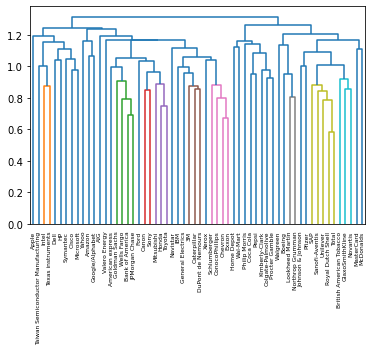

In [199]:
from sklearn.preprocessing import normalize
movements = pd.read_csv("stock.csv", index_col=0)
companies = list(movements.index)
movements = movements.values
normalized_movements = normalize(movements)
margings = linkage(normalized_movements, method = "complete")
dendrogram(margings, labels=companies, leaf_rotation=90, leaf_font_size=6)
plt.show()

## Cluster labels in hierarchical clustering

Intermediate stages of hiearachical clustering. An intermediate stage in the hierarchical clustering is specified by choosing a height on the dendrogram. Height on dendrogram specifies max distance between mergeing clusters. Specifying the point for hierchical clusters to stop merging clusters when all cluster are at least this far apart.

In [231]:
from scipy.cluster.hierarchy import fcluster
mergings = linkage(eur, method="complete")
labels = fcluster(mergings, 15, criterion="distance")
print(labels)
pairs = pd.DataFrame({"labels": labels, "countries":country_names})
pairs.sort_values("labels").head(12)

[ 9  8 11 20  2  1 17 14  6 13  6  3 18 22 12 19  4  1 20  6 21 18 23  4
 15 22 22 10  7 14 23 19  7 22 12 13  5 19 16 17  1 23]


,labels,countries
5,1,Belarus
40,1,Ukraine
17,1,Georgia
4,2,Azerbaijan
11,3,Czech Republic
16,4,France
23,4,Israel
36,5,Spain
8,6,Bulgaria
19,6,Greece


### Different linkage, different hierarchical clustering!


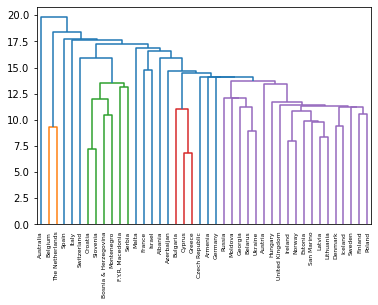

In [235]:
mergings = linkage(eur, method="single")
dendrogram(mergings, labels=country_names, leaf_font_size=6, leaf_rotation=90)
plt.show()

### Extracting the cluster labels

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
1,14,3,0
2,0,0,14
3,0,11,0


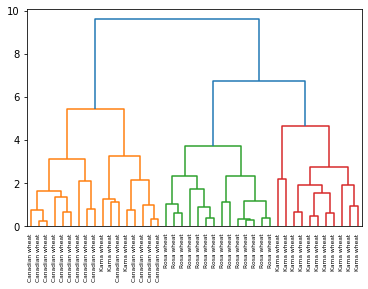

In [242]:
from scipy.cluster.hierarchy import fcluster
mergings = linkage(samples, method="complete")
dendrogram(mergings, labels=n_samples,leaf_font_size=6,leaf_rotation=90)
labels = fcluster(mergings, 6, criterion="distance")
df = pd.DataFrame({"labels":labels,"varieties":n_samples})
ct = pd.crosstab(df["labels"], df["varieties"])
ct

## t-SNE for 2-dimensional maps

t-SNE has no separate fit() and transform() methods so it can't be extended to include new data samples. t-SNE features are different every time even on the same data. But they have the same position to one another.


### t-SNE visualization of grain dataset

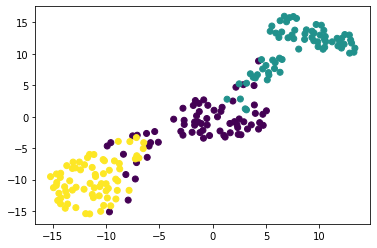

In [258]:
from sklearn.manifold import TSNE
samples = pd.read_csv("seeds.csv", header=None)
variety_numbers = samples.iloc[:,7]
samples = samples.drop(7, axis=1).values

model = TSNE(learning_rate=200)
tsne_features = model.fit_transform(samples)
xs = tsne_features[:,0]
ys = tsne_features[:,1]

plt.scatter(xs, ys, c=variety_numbers)
plt.show()

The t-SNE visualization manages to separate the 3 varieties of grain samples. 

### A t-SNE map of the stock market


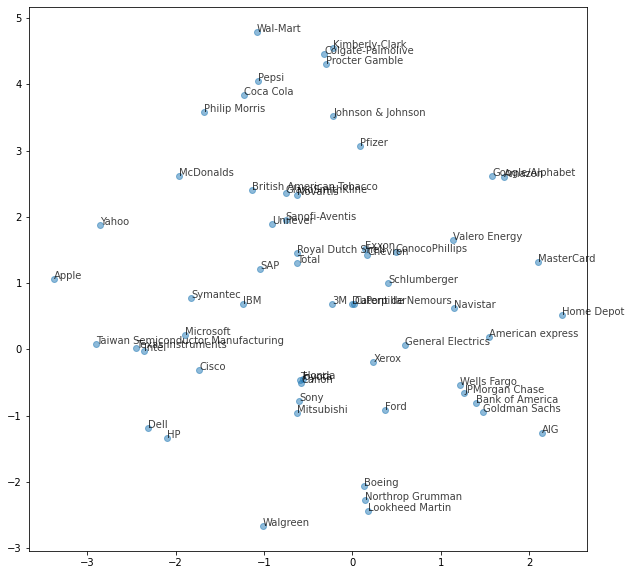

In [276]:
model = TSNE(learning_rate = 50)
tsne_features = model.fit_transform(normalized_movements)
xs = tsne_features[:,0]
ys = tsne_features[:,1]
plt.figure(figsize=[10,10])
plt.scatter(xs, ys, alpha=0.5)
for x, y, company in zip (xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=10, alpha=0.75)
plt.show()